In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
files = glob.glob('../../../FeT_GOM22SU/11.22.2022//*.txt')
files

#here is where the output will go 
path2 = '../../../FeT_GOM22SU/cal-curve-11-22-22.csv'
files

['../../../FeT_GOM22SU/11.22.2022\\0_uM_Absorbance__0__00.txt',
 '../../../FeT_GOM22SU/11.22.2022\\10_uM_Absorbance__0__05.txt',
 '../../../FeT_GOM22SU/11.22.2022\\10_uM_Absorbance__1__06.txt',
 '../../../FeT_GOM22SU/11.22.2022\\10_uM_Absorbance__2__07.txt',
 '../../../FeT_GOM22SU/11.22.2022\\15_uM_Absorbance__0__08.txt',
 '../../../FeT_GOM22SU/11.22.2022\\15_uM_Absorbance__1__09.txt',
 '../../../FeT_GOM22SU/11.22.2022\\15_uM_Absorbance__2__10.txt',
 '../../../FeT_GOM22SU/11.22.2022\\2.5_uM_Absorbance__0__01.txt',
 '../../../FeT_GOM22SU/11.22.2022\\20_uM_Absorbance__0__11.txt',
 '../../../FeT_GOM22SU/11.22.2022\\20_uM_Absorbance__1__12.txt',
 '../../../FeT_GOM22SU/11.22.2022\\20_uM_Absorbance__2__13.txt',
 '../../../FeT_GOM22SU/11.22.2022\\224382_Absorbance__0__14.txt',
 '../../../FeT_GOM22SU/11.22.2022\\224382_Absorbance__1__15.txt',
 '../../../FeT_GOM22SU/11.22.2022\\224382_Absorbance__2__16.txt',
 '../../../FeT_GOM22SU/11.22.2022\\224383_Absorbance__0__17.txt',
 '../../../FeT_GOM22S

In [3]:
def GET_DATA(name):
    df = pd.read_csv(name, skiprows=15, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    #df['wl'] = df['wl']
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [4]:
frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

,0_uM_Absorbance__0__00.txt,10_uM_Absorbance__0__05.txt,10_uM_Absorbance__1__06.txt,10_uM_Absorbance__2__07.txt,15_uM_Absorbance__0__08.txt,15_uM_Absorbance__1__09.txt,15_uM_Absorbance__2__10.txt,2.5_uM_Absorbance__0__01.txt,20_uM_Absorbance__0__11.txt,20_uM_Absorbance__1__12.txt,...,224391_Absorbance__0__29.txt,224391_Absorbance__1__30.txt,224391_Absorbance__2__31.txt,224392_Absorbance__0__32.txt,224392_Absorbance__1__33.txt,224392_Absorbance__2__34.txt,5_uM_Absorbance__0__02.txt,5_uM_Absorbance__1__03.txt,5_uM_Absorbance__2__04.txt,wl
wl,,,,,,,,,,,,,,,,,,,,,
189,-143617.161514,-190976.208080,-82797.870829,-24918.756073,-354230.144111,-182464.302467,4984.736614,-1628.955034,-91074.213239,-35.556634,...,-412851.930100,-2787.253416,-15405.449440,-57412.910826,-22487.954537,-376603.842950,-242094.412158,-295834.460568,-208857.057315,189
190,-140735.570158,-187131.159958,-81138.535956,-24414.108197,-347098.237833,-178803.216499,4885.084665,-1596.656357,-89246.862623,-34.831171,...,-404528.867891,-2731.921204,-15093.870051,-56261.918976,-22037.668602,-369011.739559,-237215.668229,-289876.444475,-204670.416605,190
191,-137892.783838,-183338.070457,-79501.519401,-23916.318499,-340062.705378,-175191.432860,4786.769725,-1564.787079,-87444.120079,-34.114851,...,-396318.423145,-2677.326024,-14786.519752,-55126.413577,-21593.433824,-361522.360491,-232402.912370,-283998.963758,-200540.101862,191
192,-135088.539494,-179596.586128,-77886.670059,-23425.340070,-333122.891165,-171628.617330,4689.782765,-1533.344331,-85665.818788,-33.407621,...,-388219.828778,-2623.462936,-14483.369650,-54006.289739,-21155.209271,-354135.006067,-227655.695280,-278201.470413,-196465.731616,192
193,-132322.574067,-175906.353519,-76293.836824,-22941.125998,-326278.139611,-168114.435688,4594.114756,-1502.325241,-83911.791932,-32.709430,...,-380232.317706,-2570.327000,-14184.390853,-52901.442573,-20722.954009,-346848.976606,-222973.567655,-272483.416433,-192446.924399,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,5.711641,2.284028,-57.074789,-115.290974,-117.576118,3.426459,-57.074791,-175.792173,-55.932480,-55.932479,...,-235.151707,-295.653050,-58.218017,-116.434047,-176.935346,-236.294052,65.070602,63.928014,-57.074743,876
877,5.929056,2.370994,-60.441651,-122.068181,-124.440291,3.556907,-60.441653,-186.066690,-59.255859,-59.255858,...,-248.880052,-312.878705,-61.628362,-123.254737,-187.253346,-250.065880,68.741845,67.555773,-60.441605,877
878,6.150530,2.459584,-63.938319,-129.105812,-131.566512,3.689792,-63.938321,-196.733874,-62.708232,-62.708231,...,-263.132494,-330.760701,-65.169325,-130.336663,-197.964825,-264.362617,72.548577,71.318211,-63.938273,878


In [5]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code 
names = d.columns.str.rsplit('_', n=7).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df['wl'] = df.index
df

,0,10,15,2.5,20,224382,224383,224384,224385,224386,224387,224391,224392,5,wl
wl,,,,,,,,,,,,,,,
189,-143617.161514,-99564.278327,-177236.569988,-1628.955034,-31291.692531,-250502.004657,-211581.747993,-172570.622193,-158759.471164,-260335.933316,-114506.114341,-143681.544319,-152168.236104,-248928.643347,189
190,-140735.570158,-97561.268037,-173672.123223,-1596.656357,-30663.315232,-245458.677876,-207318.171755,-169101.577513,-155555.891596,-255091.582609,-112198.660787,-140784.886382,-149103.775712,-243920.843103,190
191,-137892.783838,-95585.302786,-170155.789504,-1564.787079,-30043.406508,-240483.499276,-203112.259394,-165679.336946,-152395.699061,-249918.138179,-109922.415253,-137927.422974,-146080.735964,-238980.659330,191
192,-135088.539494,-93636.198752,-166687.241910,-1533.344331,-29431.908911,-235576.005299,-198963.618313,-162303.582604,-149278.597760,-244815.117416,-107677.165263,-135108.887122,-143098.835026,-234107.632436,192
193,-132322.574067,-91713.772114,-163266.153514,-1502.325241,-28828.764992,-230735.732386,-194871.855912,-158973.996605,-146204.291897,-239782.037714,-105462.698340,-132329.011853,-140157.791063,-229301.302829,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,5.711641,-56.693912,-57.074817,-175.792173,-56.313314,2.664029,-116.433508,-217.268286,-195.958792,-216.886758,-118.717311,-196.340925,-176.554482,23.974624,876
877,5.929056,-60.046279,-60.441679,-186.066690,-59.651187,2.765489,-123.254197,-229.917826,-207.399079,-229.521804,-125.624966,-207.795707,-186.857988,25.285338,877
878,6.150530,-63.528182,-63.938347,-196.733874,-63.118325,2.868844,-130.336123,-243.049007,-219.276114,-242.638220,-132.795482,-219.687507,-197.554702,26.642838,878


Text(0.5, 1.0, 'BC_ABS_BLU22_2226_GB')

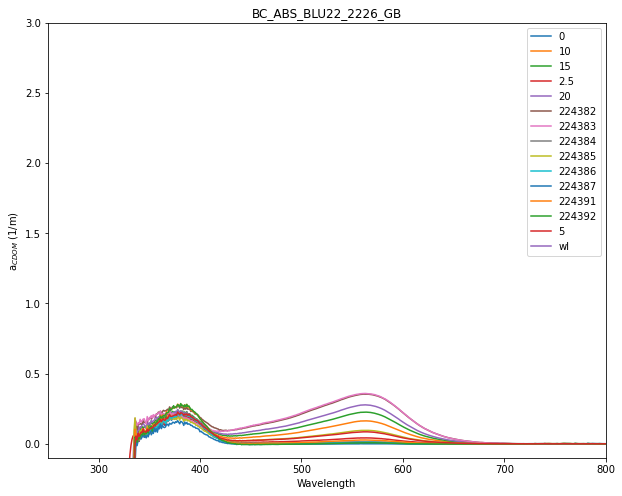

In [6]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,3)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("BC_ABS_BLU22_2226_GB")


In [7]:
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    
    abs_562 = df[(df['wl']==562)][col].mean()
    
    ydata = df[(df['wl']>=450) & (df['wl']<=700)][col]
    xdata = df[(df['wl']>=450) & (df['wl']<=700)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    inter = scipy.integrate.simps(ydata, x=xdata, even='avg')
    
    dict = {'sample':[columnName],
        'abs_562':[abs_562], 
        'intagration':[inter],}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')
ss_outs.to_csv(path2)

ss_outs

,abs_562,intagration
sample,,
0,-0.000376,-0.106259
10,0.163084,18.125598
15,0.225312,25.688569
2.5,0.041573,4.388672
20,0.276598,32.333499
224382,0.353830,43.899992
224383,0.358040,44.714846
224384,0.015158,1.489099
224385,0.096178,10.238687


EXPERIMENTAL